# Basic Analysis

Myrthe already did some great work regarding data processing. This notebook is simply meant for me (Jordi) to understand what we are working with etc etc.

The goal of this assignment is to: 

**Using this dataset, we would like to build a predictive model that is able to predict the average
mood of the user on the next day based on the data we obtained from the user on the days**

Essentially there are two approaches you can consider to create a predictive model using
this dataset: 

*(1) use an machine learning approach that can deal with temporal data (e.g. ARIMA, recurrent neural networks)*

*(2) you can try to aggregate the history somehow to create attributes that can be used in a more common machine learning approach (e.g. SVM, decision tree).*

For instance, you use the average mood during the last five days as a predictor. Ample literature is present in the area of temporal data mining that describes how such a transformation can be made. We are going to focus on such a transformation in this part of the assignment. What we are trying to do is illustrated in Figure 2.

Let's go!

In [ ]:
%%capture

!pip install mlxtend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.preprocessing import minmax_scaling

In [ ]:
raw =  pd.read_csv("dataset_mood_smartphone.csv")
df = pd.read_csv("new_data.csv")

df = df.drop(["Unnamed: 0"], axis=1) if "Unnamed: 0" in df.columns else df
raw = raw.drop(["Unnamed: 0"], axis=1) if "Unnamed: 0" in raw.columns else raw

In [ ]:
df

,unique_id,id,date,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc
0,2014-02-26_AS14.01,AS14.01,2014-02-26,6.25,NaN,NaN,NaN,6.25,NaN
1,2014-03-21_AS14.01,AS14.01,2014-03-21,6.25,6.0,NaN,55.095526,6.40,75.141667
2,2014-03-22_AS14.01,AS14.01,2014-03-22,6.40,NaN,NaN,51.697063,6.80,36.636000
3,2014-03-23_AS14.01,AS14.01,2014-03-23,6.80,NaN,NaN,53.442031,6.00,50.046611
4,2014-03-24_AS14.01,AS14.01,2014-03-24,6.00,NaN,NaN,47.541687,6.75,74.968047
...,...,...,...,...,...,...,...,...,...
1210,2014-05-25_AS14.33,AS14.33,2014-05-25,6.25,3.0,8.0,34.829867,5.40,45.534460
1211,2014-05-26_AS14.33,AS14.33,2014-05-26,5.40,10.0,3.0,34.320472,6.20,111.046204
1212,2014-05-27_AS14.33,AS14.33,2014-05-27,6.20,1.0,2.0,59.382943,8.20,50.259100
1213,2014-05-28_AS14.33,AS14.33,2014-05-28,8.20,10.0,1.0,37.238750,7.00,99.281685


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   unique_id      1215 non-null   object 
 1   id             1215 non-null   object 
 2   date           1215 non-null   object 
 3   average_mood   1215 non-null   float64
 4   total_calls    522 non-null    float64
 5   total_sms      167 non-null    float64
 6   average_com    1103 non-null   float64
 7   mood_next_day  1215 non-null   float64
 8   average_soc    925 non-null    float64
dtypes: float64(6), object(3)
memory usage: 85.6+ KB


In [ ]:
df.head()

,unique_id,id,date,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc
0,2014-02-26_AS14.01,AS14.01,2014-02-26,6.25,NaN,NaN,NaN,6.25,NaN
1,2014-03-21_AS14.01,AS14.01,2014-03-21,6.25,6.0,NaN,55.095526,6.40,75.141667
2,2014-03-22_AS14.01,AS14.01,2014-03-22,6.40,NaN,NaN,51.697063,6.80,36.636000
3,2014-03-23_AS14.01,AS14.01,2014-03-23,6.80,NaN,NaN,53.442031,6.00,50.046611
4,2014-03-24_AS14.01,AS14.01,2014-03-24,6.00,NaN,NaN,47.541687,6.75,74.968047


In [ ]:
raw

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [ ]:
df.isnull().sum(axis=0)

unique_id           0
id                  0
date                0
average_mood        0
total_calls       693
total_sms        1048
average_com       112
mood_next_day       0
average_soc       290
dtype: int64

In [ ]:
df = df.replace({np.nan: 0})

In [ ]:
len(df.id.unique())

27

<AxesSubplot:>

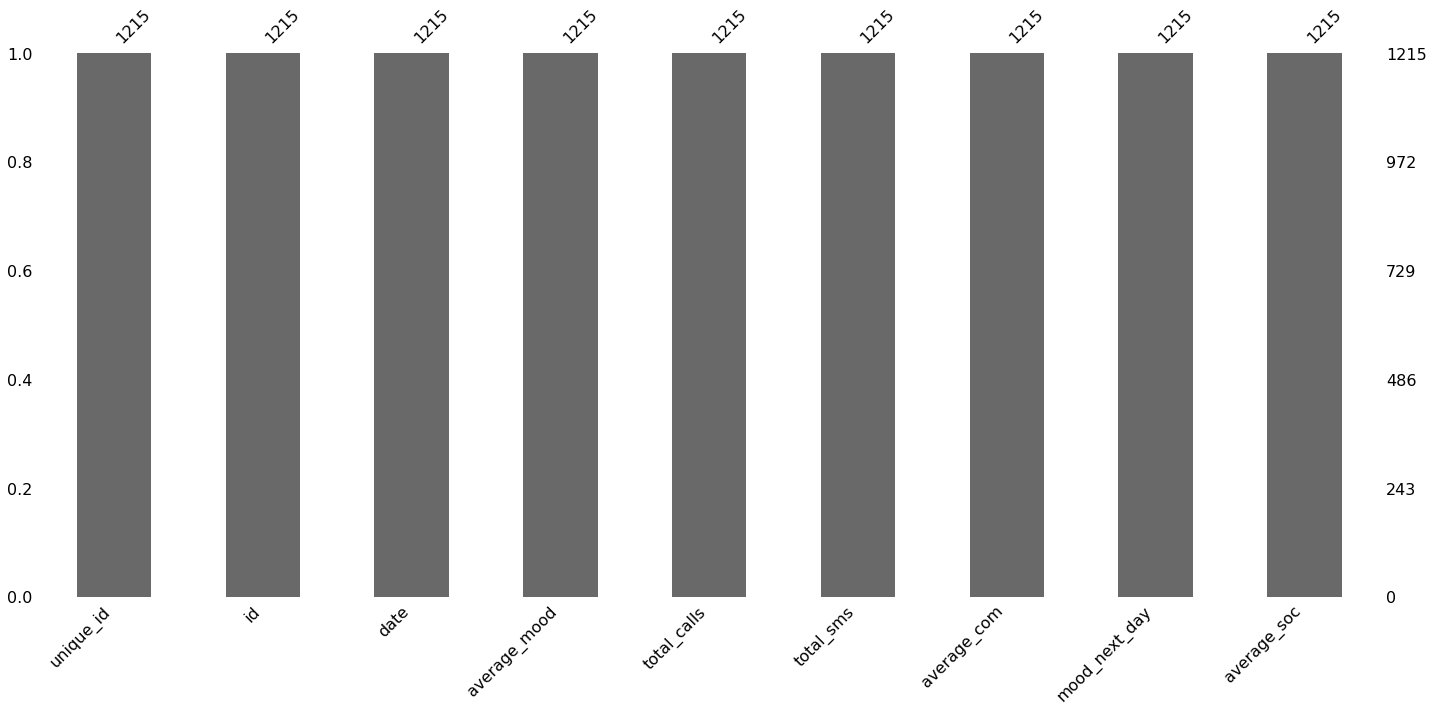

In [ ]:
import missingno as msno
%matplotlib inline
msno.bar(df)

<AxesSubplot:>

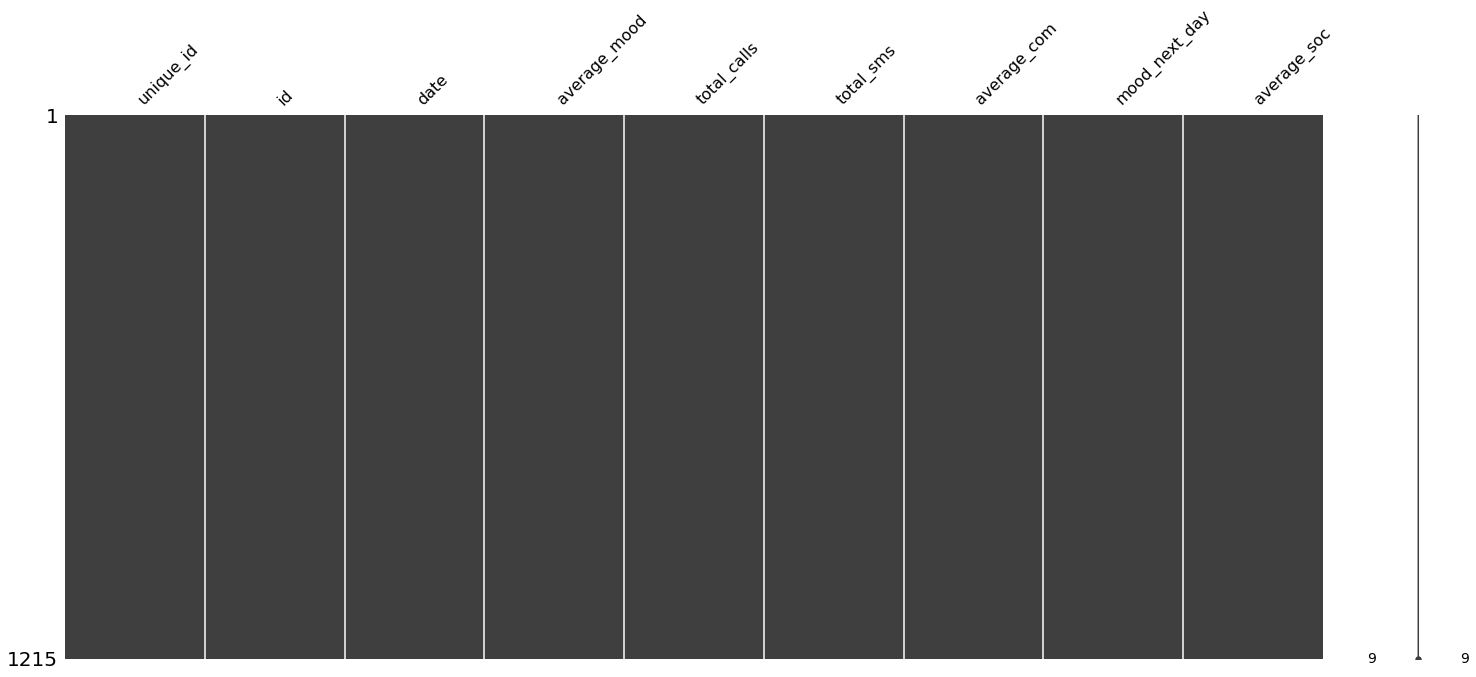

In [ ]:
msno.matrix(df)

In [ ]:
corr_ = df.corr()

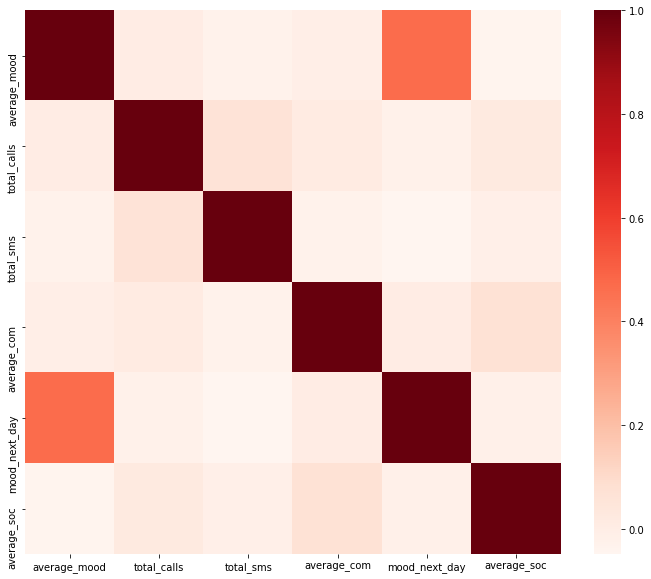

In [ ]:
# Lets see if we can plot it, because a plot can tell more than a thousands words (right?)
try:
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_, # annot=True, # Annotations will take an incredibly long time... better to leave them off
    cmap=plt.cm.Reds)
    plt.show()
except Exception as exc:
    print(f"While working without supervision...\nEncountered {exc}")

In [ ]:
dfp = df.drop(["date", "id", "unique_id"], axis=1)

In [ ]:
dfp = dfp/dfp.std(0)

In [ ]:
dfp

,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc
0,8.566807,0.000000,0.000000,0.000000,8.570173,0.000000
1,8.566807,1.578142,0.000000,1.470413,8.775858,0.583829
2,8.772410,0.000000,0.000000,1.379713,9.324349,0.284651
3,9.320686,0.000000,0.000000,1.426284,8.227366,0.388848
4,8.224135,0.000000,0.000000,1.268813,9.255787,0.582480
...,...,...,...,...,...,...
1210,8.566807,0.789071,2.660567,0.929554,7.404630,0.353790
1211,7.401721,2.630236,0.997712,0.915959,8.501612,0.862797
1212,8.498272,0.263024,0.665142,1.584837,11.244067,0.390499
1213,11.239651,2.630236,0.332571,0.993844,9.598594,0.771390


In [ ]:
dfp = minmax_scaling(dfp, columns=dfp.columns)
dfp = np.log(dfp+1)

In [ ]:
for col in dfp.columns:
    df[col] = dfp[col]

In [ ]:
df

,unique_id,id,date,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc
0,2014-02-26_AS14.01,AS14.01,2014-02-26,0.414199,0.000000,0.000000,0.000000,0.414199,0.000000
1,2014-03-21_AS14.01,AS14.01,2014-03-21,0.414199,0.176931,0.000000,0.100209,0.429730,0.019792
2,2014-03-22_AS14.01,AS14.01,2014-03-22,0.429730,0.000000,0.000000,0.094310,0.470004,0.009699
3,2014-03-23_AS14.01,AS14.01,2014-03-23,0.470004,0.000000,0.000000,0.097343,0.387766,0.013225
4,2014-03-24_AS14.01,AS14.01,2014-03-24,0.387766,0.000000,0.000000,0.087050,0.465057,0.019746
...,...,...,...,...,...,...,...,...,...
1210,2014-05-25_AS14.33,AS14.33,2014-05-25,0.414199,0.092373,0.205852,0.064506,0.321320,0.012040
1211,2014-05-26_AS14.33,AS14.33,2014-05-26,0.321320,0.279585,0.082238,0.063592,0.408968,0.029112
1212,2014-05-27_AS14.33,AS14.33,2014-05-27,0.408968,0.031749,0.055570,0.107602,0.599415,0.013281
1213,2014-05-28_AS14.33,AS14.33,2014-05-28,0.599415,0.279585,0.028171,0.068817,0.489548,0.026068


In [ ]:
corr = df.corr()

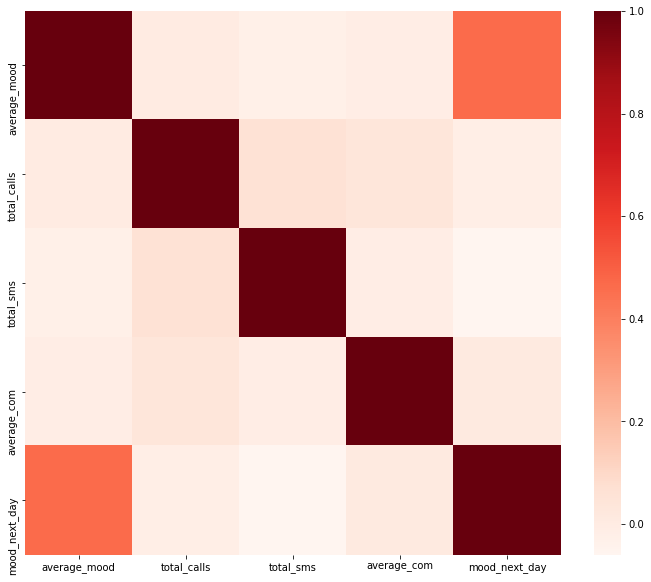

In [ ]:
# Lets see if we can plot it, because a plot can tell more than a thousands words (right?)
try:
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, # annot=True, # Annotations will take an incredibly long time... better to leave them off
    cmap=plt.cm.Reds)
    plt.show()
except Exception as exc:
    print(f"While working without supervision...\nEncountered {exc}")

In [ ]:
df.drop([x for x in df.columns if df[x].dtype != np.float64 or x == "average_mood"], axis=1)


,total_calls,total_sms,average_com,mood_next_day,average_soc
0,0.000000,0.000000,0.000000,0.414199,0.000000
1,0.176931,0.000000,0.100209,0.429730,0.019792
2,0.000000,0.000000,0.094310,0.470004,0.009699
3,0.000000,0.000000,0.097343,0.387766,0.013225
4,0.000000,0.000000,0.087050,0.465057,0.019746
...,...,...,...,...,...
1210,0.092373,0.205852,0.064506,0.321320,0.012040
1211,0.279585,0.082238,0.063592,0.408968,0.029112
1212,0.031749,0.055570,0.107602,0.599415,0.013281
1213,0.279585,0.028171,0.068817,0.489548,0.026068


<AxesSubplot:>

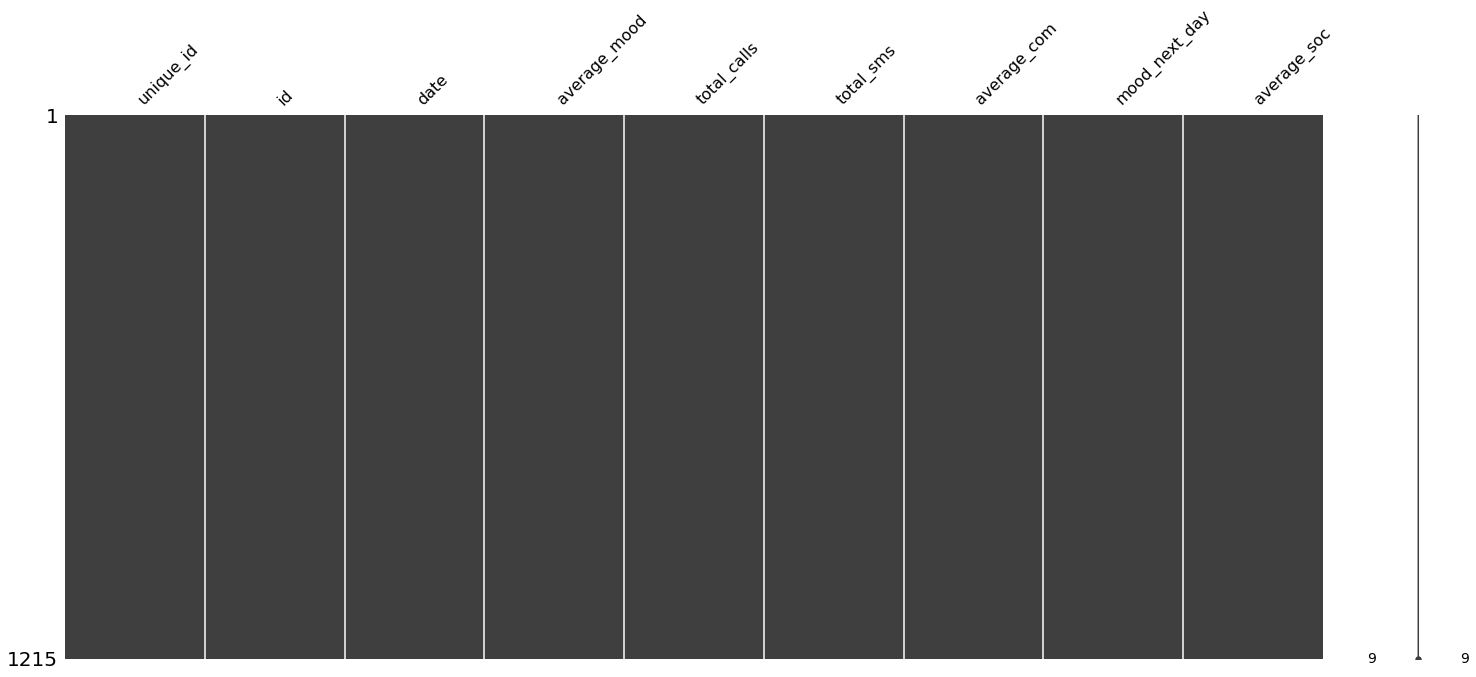

In [ ]:
msno.matrix(df)

In [ ]:
from sklearn.decomposition import PCA

n_components = 3

pca_app = PCA(n_components=n_components)

PCA_DATA = df.drop([x for x in df.columns if df[x].dtype != np.float64 or x == "average_mood"], axis=1)

pca_app.fit(
    PCA_DATA
    )

M = pca_app.transform(PCA_DATA)

In [ ]:
import plotly.express as px

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_app.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    M,
    labels=labels,
    dimensions=range(n_components),
    color=df["average_mood"]
)

fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
total_var = pca_app.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(M, x=0, y=1, z=2, color=df["average_mood"],
title=f"Total Explained Variance: {total_var:.2f}%",
labels={
    "0": "PC 1",
    "1": "PC 2",
    "2": "PC 3",
})
fig.show()

In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# D3 modules
from IPython.core.display import display, HTML, Javascript
from string import Template

In [ ]:
trace = go.Scatter(
    name='average_mood',
    x=df['average_mood'],
    y=oil['dcoilwtico'].dropna(),
    mode='lines',
    line=dict(color='rgb(20, 15, 200, 0.8)'),
    #fillcolor='rgba(68, 68, 68, 0.3)',
    fillcolor='rgba(0, 0, 216, 0.3)',
    fill='tonexty' )

data = [trace]

layout = go.Layout(
    yaxis=dict(title='Daily Oil price'),
    title='Daily oil prices from Jan 2013 till July 2017',
    showlegend = False)
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='pandas-time-series-error-bars')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d79defa5-2359-4699-82dc-d6bf5eddd7a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>